# FHNW Machine Learning - FS 2025

In [ ]:

# DO NOT EDIT THIS CELL
# ADD ADDITIONAL IMOPRTS IN ASSIGNMENT CELLS

# Notebook configs
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Bewertetes Aufgabenblatt 1

**Ausgabe:** Montag, 10.3.2025

**Abgabe:** Freitag, 11.4.2025, 23:59 Uhr

## Vorgaben zu Umsetzung und Abgabe

- Der Code in diesem Notebook muss lauffähig sein bei Ausführung im Docker-Container zum Repo. Nur was durchläuft wird korrigiert.
- Es darf kein Code ausgelagert werden, i.e. sämtlicher Code muss sich im Notebook befinden. Notebooks dürfen weder umbenannt werden, noch soll die Ordnerstruktur im Repo verändert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Überschrift, Colorbar, ..), so dass der Plot ohne den Code zu konsultieren, verstanden werden kann.
- Als **Abgabe** zählt der letzte Commit vor Abgabetermin in Ihrem Fork des Repos.  
- **Löschen, kopieren, duplizieren, splitten und verschieben Sie die vorhandenen Zellen nicht. Für fehlende Antwortzellen gibt es keine Punkte.** Sie dürfen beliebig viele weitere Zellen hinzufügen (nur via **insert new cell**).
- Laufzeit vom Notebook: Das Notebook sollte in weniger als 30 Minuten ausgeführt werden können.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden.  
Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text kopiert werden, weder vom Internet noch von Mitstudierenden.**  
Beim Vorfinden von kopiertem Code werden alle Aufgaben von allen Beteiligten mit 0 Punkten bewertet.


#### Python Module

Neben den Python-Basismodulen dürfen Sie die folgenden Module immer benutzen: `numpy`, `pandas`, `matplotlib`, `seaborn`,  `tqdm` (für Progress-Bars).

Sie dürfen auch generell [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html), [sklearn.pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) und [sklearn.compose](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) benutzen.

Zusätzliche Module dürfen Sie nur verwenden wenn ausdrücklich erwähnt oder bereits vorgegeben in der Code-Cell.

### Bewertung

Bewertet wird:

- Vollständigkeit (Code, Text)
- Korrektheit (Code, Text)
- Implementation (z.B. Vektorisierung der Operationen, Scikit-Learn API, Visualisierungen, Lesbarkeit Code/Output)

## Einleitung

Fiona arbeitet bei einem Velo-Verleiher, der überall im Kanton Velo-Stationen betreibt. An diesen Stationen können Kunden Velos ausleihen und abgeben. Die Velos müssen regelmässig gewartet werden und stehen dann den Kunden nicht zur Verfügung. Der Velo-Verleiher möchte nun die Wartungen möglichst optimal planen. Fiona bittet dich deshalb um Hilfe. Fiona fragt sich insbesondere, ob du mit Hilfe der vom Velo-Verleiher in der Vergangenheit gesammelten Daten vorhersagen kannst, wann wie viele Ausleihen zu erwarten sind, damit die Wartungen optimaler geplant werden können.

Die Attribute im Datensatz `velo_ausleihe_train.csv` (bzw. `velo_ausleihe_test.csv`) sollten selbsterklärend sein. Die Zielvariable ist `anzahl_ausleihen`.

## Aufgabe 1 (8 Punkte)

Bevor man einen Datensatz modelliert ist es wichtig diesen zu untersuchen und kennenzulernen. Benutze deine Kenntnisse aus dem Modul _dsp_ um die Daten einzulesen, zu visualisieren und zu beschreiben (im Sinne der deskriptiven Statistik).

Unternimm folgende Schritte:
    
- Lies den Datensatz ein und verschaffe dir einen Überblick. Verwende zum Laden eine **relative Pfadangabe direkt aus dem Verzeichnis `graded_assignment_1`**.
- Berechne und zeige wichtige Kennzahlen.
- Visualisiere jede Variable mit einem sinnvollen Plot. Berücksichtige dabei die Fragestellung.

Versuche durch diese Explorative Datenanalyse abzuschätzen, wie gut die Vorhersage gelingen könnte, welche Variablen wichtig sein könnten und wie man Variablen allenfalls präprozessieren muss.

## Erste 5 Zeilen des Datensatzes

,saison,jahr,monat,feiertag,wochentag,wetterlage,temp,feuchtigkeit,windgeschwindigkeit,anzahl_ausleihen,windchill
0,fruehling,2018,1,0,Samstag,bewölkt#nebel,8.175849,80.5833,10.749882,985,6.315638
1,fruehling,2018,1,0,Sonntag,bewölkt#nebel,9.083466,69.6087,16.652113,801,6.582016
2,fruehling,2018,1,0,Montag,klar#wenig_wolken,1.229108,43.7273,16.636703,1349,-3.181089
3,fruehling,2018,1,0,Dienstag,klar#wenig_wolken,1.400000,59.0435,10.739832,1562,-1.821729
4,fruehling,2018,1,0,Mittowch,klar#wenig_wolken,2.666979,43.6957,12.522300,1600,-0.674847


## Grundlegende Statistik

,jahr,monat,feiertag,temp,feuchtigkeit,windgeschwindigkeit,anzahl_ausleihen,windchill
count,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00
mean,2018.00,6.53,0.03,14.87,64.37,12.82,3405.76,13.92
std,0.00,3.45,0.16,8.91,14.87,5.15,1378.75,10.14
min,2018.00,1.00,0.00,-5.22,0.00,1.50,431.00,-10.00
25%,2018.00,4.00,0.00,7.28,53.83,9.08,2132.00,4.82
50%,2018.00,7.00,0.00,14.52,64.75,12.52,3740.00,14.52
75%,2018.00,10.00,0.00,22.86,74.21,15.75,4586.00,22.86
max,2018.00,12.00,1.00,31.91,97.25,34.00,6043.00,31.91



## Weitere Kennzahlen

- **Durchschnittliche Anzahl an Ausleihen:** 3405.76
- **Minimale Anzahl an Ausleihen:** 431
- **Maximale Anzahl an Ausleihen:** 6043


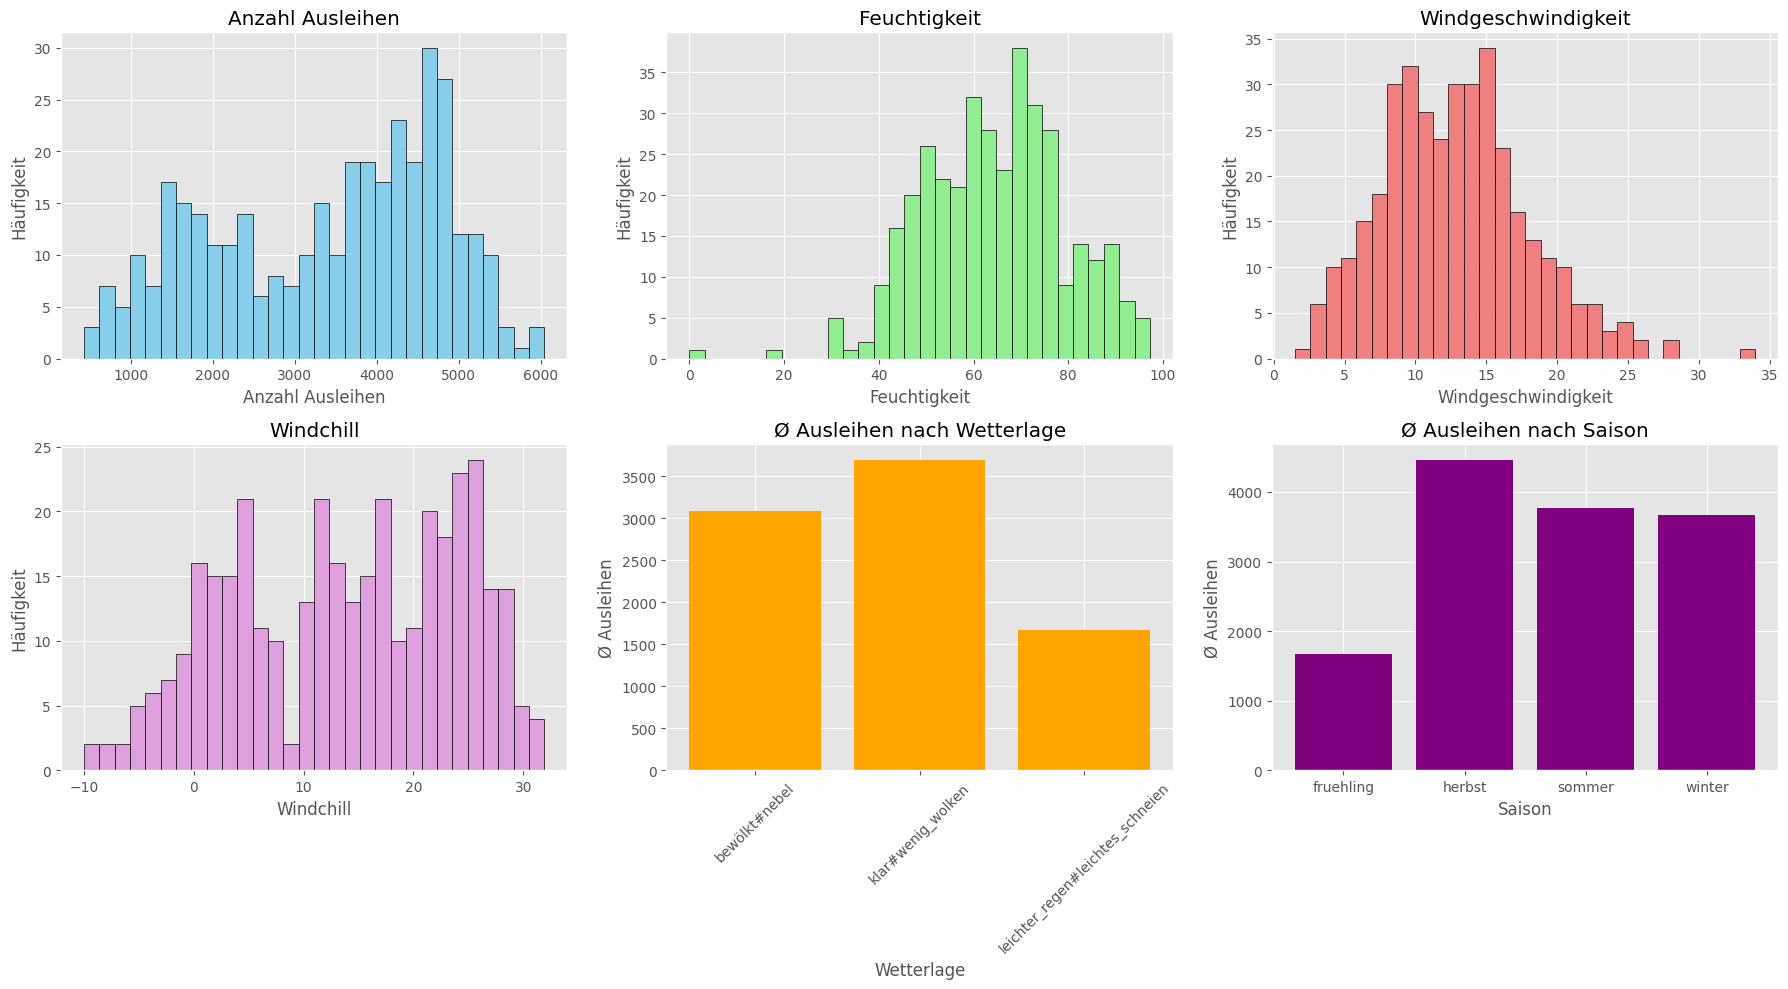

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

os.chdir("/home/jovyan/work/graded_assignments/graded_assignment_1")
df = pd.read_csv("velo_ausleihe_train.csv")

display(Markdown("## Erste 5 Zeilen des Datensatzes"))
display(df.head())

display(Markdown("## Grundlegende Statistik"))
display(df.describe().style.format("{:.2f}"))

avg = round(df["anzahl_ausleihen"].mean(), 2)
min_val = df["anzahl_ausleihen"].min()
max_val = df["anzahl_ausleihen"].max()

display(Markdown(f"""
## Weitere Kennzahlen

- **Durchschnittliche Anzahl an Ausleihen:** {avg}
- **Minimale Anzahl an Ausleihen:** {min_val}
- **Maximale Anzahl an Ausleihen:** {max_val}
"""))

# 4. Visualisierungen
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

axs[0, 0].hist(df["anzahl_ausleihen"], bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title("Anzahl Ausleihen")
axs[0, 0].set_xlabel("Anzahl Ausleihen")
axs[0, 0].set_ylabel("Häufigkeit")

axs[0, 1].hist(df["feuchtigkeit"], bins=30, color='lightgreen', edgecolor='black')
axs[0, 1].set_title("Feuchtigkeit")
axs[0, 1].set_xlabel("Feuchtigkeit")
axs[0, 1].set_ylabel("Häufigkeit")

axs[0, 2].hist(df["windgeschwindigkeit"], bins=30, color='lightcoral', edgecolor='black')
axs[0, 2].set_title("Windgeschwindigkeit")
axs[0, 2].set_xlabel("Windgeschwindigkeit")
axs[0, 2].set_ylabel("Häufigkeit")

axs[1, 0].hist(df["windchill"], bins=30, color='plum', edgecolor='black')
axs[1, 0].set_title("Windchill")
axs[1, 0].set_xlabel("Windchill")
axs[1, 0].set_ylabel("Häufigkeit")

wetterlage_mean = df.groupby('wetterlage')['anzahl_ausleihen'].mean()
axs[1, 1].bar(wetterlage_mean.index, wetterlage_mean.values, color='orange')
axs[1, 1].set_title("Ø Ausleihen nach Wetterlage")
axs[1, 1].set_xlabel("Wetterlage")
axs[1, 1].set_ylabel("Ø Ausleihen")
axs[1, 1].tick_params(axis='x', rotation=45)

saison_mean = df.groupby('saison')['anzahl_ausleihen'].mean()
axs[1, 2].bar(saison_mean.index, saison_mean.values, color='purple')
axs[1, 2].set_title("Ø Ausleihen nach Saison")
axs[1, 2].set_xlabel("Saison")
axs[1, 2].set_ylabel("Ø Ausleihen")

plt.tight_layout()
plt.show()


Diskutiere deine Einsichten zu den Daten und zum Vorhersagevorhaben für die Zielgrösse auf Basis deiner Explorativen Datenanalyse.

(Es folgt eine Textantwortzelle. Nicht löschen.)

Die explorative Datenanalyse zeigt deutliche saisonale und zeitliche Trends in den Ausleihzahlen. Über das Jahr hinweg gibt es starke Schwankungen, wobei die höchsten Ausleihzahlen in den Sommermonaten von Mai bis September auftreten. In den Wintermonaten hingegen ist die Nachfrage deutlich geringer. Auch innerhalb der Woche gibt es Unterschiede: Die Analyse zeigt, dass die Ausleihen an Werktagen oft anders verteilt sind als am Wochenende. Besonders an Samstagen und Sonntagen könnten Freizeitaktivitäten die Nutzung beeinflussen, während unter der Woche möglicherweise ein stärkerer Einfluss durch Pendlerverkehr besteht.

Neben der saisonalen Komponente spielt das Wetter eine entscheidende Rolle. Die ersten Auswertungen deuten darauf hin, dass höhere Temperaturen tendenziell mit einer höheren Anzahl an Ausleihen einhergehen. Extreme Wetterbedingungen wie starker Regen oder sehr niedrige Temperaturen könnten die Nachfrage nach Fahrrädern erheblich reduzieren. Die Analyse der Wetterdaten zeigt eine mögliche Korrelation zwischen Temperatur und Anzahl der Ausleihen, die in der Vorhersage berücksichtigt werden sollte.

## Aufgabe 2 (15 Punkte)

In dieser Aufgabe implementieren und validieren wir ein _Ridge Regression_-Modell.

### Ridge Regression

Ridge Regression ist eine regularisierte Form ($l_2$-Regularisierung) der Ordinary Least Squares (OLS) Kostenfunktion für die lineare Regression.  

Die Ridge Regression-Kostenfunktion $J(\mathbf{w})$ für einen Datensatz $\cal{D}=\{(\mathbf{x}^{(1)}, y^{(1)}), \dots, (\mathbf{x}^{(n)}, y^{(n)}) \}$ mit $n$ Datenpunkten ist:

\begin{align}
J(\mathbf{w}) &= \frac{1}{2n}\sum_{i=1}^n (y^{(i)} - \mathbf{x}^{(i)T}\mathbf{w})^2 + \frac{1}{2}\lambda \sum_{j=1}^p w_j^2 
\end{align}

Der $i$-te Datenpunkt $\mathbf{x}^{(i)}$ ist ein Vektor der Dimensionalität $\mathbb{R}^{p +1}$: $\mathbf{x}^{(i)} = \Big(1, x_1^{(i)}, \dots , x_p^{(i)}\Big)$.

$\mathbf{w} = (w_0, \dots, w_p)$ sind dabei die Modellkoeffizienten, $\lambda$ ist die Regularisierungsstärke.


**Beachte:**

- In `sklearn` wird statt $\lambda$ jeweils $\alpha$ (`alpha`) als Bezeichnung für die Regularisierungsstärke verwendet (weil `lambda` ein reserviertes Wort ist in Python).
- Um im Folgenden Gradient Descent für die obige Kostenfunktione umzusetzen, musst du diese ableiten.
- Implementiere alles vektorisiert.

### Gradient Descent Varianten

Bei _Batch Gradient Descent (BGD)_ berechnet man den Gradienten der Kostenfunktion bezüglich der Modellparameter für jeden _Gradient Descent Step_ mit **allen Datenpunkten**. Damit berechnet man den Gradient exakt bei gegebenem Datensatz. Man kann den Gradienten jedoch auch mit einem Subset der Datenpunkte approximieren. Dadurch verringert sich der Rechenaufwand. Mit _Stochastic Gradient Descent (SGD)_ nimmt man nur **einen, zufällig ausgewählten, Datenpunkt** (deshalb _stochastic_) um den Gradienten zu schätzen. Man iteriert dabei in zufälliger Reihenfolge wiederholt (Epoche) durch alle Datenpunkte.

Implementiere die Optionen `optimization_method="bgd"` und `optimization_method="sgd"` um das Modell wahlweise mit _BGD_ oder _SGD_ zu optimieren. 

### Normalengleichung

Mit der Normalengleichung lässt sich eine analytisch exakte Lösung für ein regularisiertes Least Squares Problem berechnen:

\begin{equation}
\hat{\mathbf{w}} = (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{1}_{neq})^{-1}\mathbf{X}^T \mathbf{y}
\end{equation}

Füge auch für die Normalengleichung auch noch Optimierungsoption `optimization_method="normalequation"` hinzu.

Die Matrix $(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{1})$ ist für $\alpha > 0$ **immer** invertierbar. Verwende zum Invertieren die numpy-Funktion `np.linalg.pinv`.

$\mathbf{1}_{neq}$ ist hier eine Diagonalmatrix der Dimension $(p + 1 \times p + 1)$ mit $1$-en auf der Diagonalen ausser an der Position $(0,0)$ (oben links), welche $0$ gesetzt wird, genauso wie sämtliche Offdiagonalelemente.

Ergänze die untenstehende Klasse und deren Methoden. Folge der Scikit-Learn API ([Link](https://scikit-learn.org/stable/developers/develop.html)): Das bedeutet im Wesentlichen, dass du die Methoden implementieren sollst, die in der Klasse schon vorgegeben sind.

Beachte die in den Doc-Strings spezifizierten Angaben, insbesondere auch die der Shapes der Inputs und Outputs der einzelnen Methoden.

In [2]:
from typing import Self
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm


class RidgeRegression(BaseEstimator):
    """Linear Regression

    Args:
    -----
        epsilon: if norm of gradient falls below epsilon,
            gradient descent terminates (disable with negative values)
        max_num_steps: max number of steps for gradient descent
        learning_rate: learning rate for gradient descent
        optimization_method: one of 'bgd' (batch gradient descent),
            'sgd' (stochastic gradient descent), 'normalequation'
        alpha: regularization strength (lambda)
        verbose: whether to print progress during model training (optional)
    """

    def __init__(
            self,
            epsilon: float = -1,
            max_num_steps: int = 1000,
            learning_rate: float = 0.1,
            optimization_method: str = "bgd",
            alpha: float = 0.0,
            verbose: bool = True
    ):
        self.alpha = alpha
        self.epsilon = epsilon
        self.max_num_steps = max_num_steps
        self.learning_rate = learning_rate
        self.optimization_method = optimization_method
        self.verbose = verbose
        self.w_ = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> Self:
        """Fit the model coefficients.

        Args:
            X: input data (n, p)
            y: input labels (n, )

        Attributes>
            w_: model coefficients as 1d array, including bias weight w_0

        Returns:
            self
        """
        n, p = X.shape
        X_biased = self._add_bias(X)
        self.w_ = np.zeros(p + 1)

        # Normal equation solution
        if self.optimization_method == "normalequation":
            I = np.eye(p + 1)
            I[0, 0] = 0
            self.w_ = np.dot(
                np.dot(np.linalg.pinv(np.dot(X_biased.T, X_biased) + self.alpha * I), X_biased.T),
                y)
            return self

        # BGD OR SGD
        for step in tqdm(range(self.max_num_steps), disable=not self.verbose, colour='green'):
            grad = self.gradient(X, y)
            self.w_ -= self.learning_rate * grad

            if self.epsilon > 0 and np.linalg.norm(grad) < self.epsilon:
                if self.verbose:
                    print(f"Training stopped after {step} steps")
                break
        return self

    def gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Calculate Gradient of Cost Function.

        Args:
            X: input data (n, p)
            y: input labels (n, )

        Returns:
            dJ/dw gradient vector (p + 1, )
        """
        X_biased = self._add_bias(X)
        n = X.shape[0]

        if self.optimization_method == "bgd":
            y_pred = self.predict(X)
            error = y - y_pred
            gradient = (-1 / n) * np.dot(X_biased.T,
                                         error)  # Array mit den partiellen Ableitungen der Kostenfunktion nach jedem Gewicht (inkl. Bias) -> Ableitungen
            gradient[1:] += 2 * self.alpha * self.w_[1:]  # L2 Regression
            return gradient

        elif self.optimization_method == "sgd":
            i = np.random.randint(n)
            xi = X_biased[i]
            yi = y[i]
            error = yi - np.dot(xi, self.w_)
            gradient = -1 * xi * error
            gradient[1:] += 2 * self.alpha * self.w_[1:]
            return gradient

    def cost(self, X: np.ndarray, y: np.ndarray) -> float:
        """Evaluate the Cost Function.

        Args:
            X: input data (n, p)
            y: input labels (n, )

        Returns:
            total cost
        """
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        l2_regularization = self.alpha * np.sum(self.w_[1:] ** 2)  # Only regularize non-bias terms
        return float(mse + l2_regularization)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Calculate Predictions.

        Args:
            X: input Data (n, p)

        Returns:
            Predictions (n, )
        """
        X_biased = self._add_bias(X)
        return np.dot(X_biased, self.w_)

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate R^2

        Args:
            X: Input Data (n, p)
            y: Input Labels (n, )

        Returns:
            R^2
        """
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - y.mean()) ** 2)
        return float(1 - (ss_res / ss_tot))

    def _add_bias(self, X: np.ndarray) -> np.ndarray:
        """Add bias term (column of 1s) to input data"""
        return np.c_[np.ones(X.shape[0]), X]

Die folgende Zelle enthält verschiedene Tests die deine Implementation prüfen. Sorge dafür, dass die folgenden Tests erfolgreich sind. Stelle sicher, dass die Input-Shapes der Methoden den Doc-Strings entsprechen.

**Achtung: Die Tests decken nicht alles ab. Du kannst also nicht davon ausegehen, dass deine Implementation korrekt ist sobald die Tests erfolgreich sind.**

Deine Abgabe wird noch mit weiteren, für dich nicht sichtbaren Tests, geprüft.

In [3]:
# CODE ANTWORTZELLE
import numpy as np
from sklearn.datasets import make_regression


def print_result(test_name, passed, expected, actual):
    status = "Passed" if passed else "Failed"
    print(f"{status} test: {test_name}")
    print(f"----> Expected: {expected}")
    print(f"----> Actual: {actual}")


def run_test_multivariate():
    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=2, n_targets=1, random_state=123
    )
    w_true = np.concatenate([np.array([5.0]), w_true])

    rr = RidgeRegression(alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1)
    rr.fit(Xdummy, ydummy)

    try:
        np.testing.assert_allclose(w_true, rr.w_, atol=1e-3)
        print_result("run_test_multivariate", True, w_true, rr.w_)
    except AssertionError:
        print_result("run_test_multivariate", False, w_true, rr.w_)


def run_test_univariate():
    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    w_true = np.concatenate([np.array([5.0]), np.array([w_true])])

    rr = RidgeRegression(alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1)
    rr.fit(Xdummy, ydummy)
    try:
        np.testing.assert_allclose(w_true, rr.w_, atol=1e-3)
        print_result("run_test_univariate", True, w_true, rr.w_)
    except AssertionError:
        print_result("run_test_univariate", False, w_true, rr.w_)


def run_test_score():
    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    rr = RidgeRegression(alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1)
    rr.fit(Xdummy, ydummy)
    score = rr.score(Xdummy, ydummy)
    expected_score = 1.0

    try:
        np.testing.assert_almost_equal(score, expected_score, decimal=3)
        print_result("run_test_score", True, expected_score, score)
    except AssertionError:
        print_result("run_test_score", False, expected_score, score)


def run_test_cost():
    Xdummy, ydummy, _ = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    rr = RidgeRegression(alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1)
    rr.fit(Xdummy, ydummy)
    actual_cost = rr.cost(Xdummy, ydummy)
    expected_cost = 1e-6

    try:
        assert actual_cost < expected_cost
        print_result("run_test_cost", True, f"< {expected_cost}", actual_cost)
    except AssertionError:
        print_result("run_test_cost", False, f"< {expected_cost}", actual_cost)


def run_test_gradient():
    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    w_true = np.concatenate([np.array([5.0]), np.array([w_true])])

    rr = RidgeRegression(alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1)
    rr = rr.fit(Xdummy, ydummy)

    expected_gradient = np.array([-6.92655851, -59.01320294])
    weights = np.array([0.0, 0.0])
    rr.w_ = weights
    actual_gradient = rr.gradient(Xdummy, ydummy)
    try:
        np.testing.assert_allclose(actual_gradient, expected_gradient)
        print_result("run_test_gradient", True, expected_gradient, actual_gradient)
    except AssertionError:
        print_result("run_test_gradient", False, expected_gradient, actual_gradient)


for test in [run_test_multivariate, run_test_univariate, run_test_score, run_test_cost,
             run_test_gradient]:
    try:
        test()
    except Exception as e:
        print(f"Error during testing - test: {test} error: {e}")



  0%|          | 0/1000 [00:00<?, ?it/s]

Training stopped after 103 steps
Passed test: run_test_multivariate
----> Expected: [ 5.         84.23424376  8.31949883]
----> Actual: [ 5.00059277 84.2337517   8.3198281 ]


  0%|          | 0/1000 [00:00<?, ?it/s]

Training stopped after 75 steps
Passed test: run_test_univariate
----> Expected: [ 5.         43.08627633]
----> Actual: [ 5.0000003 43.0856769]


  0%|          | 0/1000 [00:00<?, ?it/s]

Training stopped after 75 steps
Passed test: run_test_score
----> Expected: 1.0
----> Actual: 0.9999999998061698


  0%|          | 0/1000 [00:00<?, ?it/s]

Training stopped after 75 steps
Passed test: run_test_cost
----> Expected: < 1e-06
----> Actual: 4.902575731960773e-07


  0%|          | 0/1000 [00:00<?, ?it/s]

Training stopped after 75 steps
Passed test: run_test_gradient
----> Expected: [ -6.92655851 -59.01320294]
----> Actual: [ -6.92655851 -59.01320294]


## Aufgabe 3 (10 Punkte)

In dieser Aufgabe wendest du deine Estimator-Klasse Algorithmus auf den Velo-Datensatz an. Teste und untersuche deine Implementation der Klasse `RidgeRegression` und lerne gleichzeitig den Datensatz besser kennen.


1) Trainiere nun ein Modell und verwende ausschliesslich `temp` als Input-Variable um die Zielvariable vorherzusagen. Lass die Variablen komplett unverändert.
2) Vergleiche die Modell-Koeffizienten berechnet mit Gradient Descent und Normalengleichung. Gib dazu die Modellkoeffizienten aus.
3) Berechne das Bestimmtheitsmass $R^2$ mit der `score()` Methode und gib den Wert aus.
4) Zeige in einer Tabelle für die ersten 10 Beobachtungen: `y_true` ($\mathbf{y}$), `y_hat` ($\mathbf{\hat{y}}$)und `y_true - y_hat` (das Residuum $\mathbf{r}$). Erstelle ein `pd.DataFrame` und zeige dieses mit `print` an.
5) Berechne und zeige den Wert der Kostenfunktion nach dem Optimieren der Koeffizienten mit Gradient Descent.

Verwende `print()` Statements um Fragen nach bestimmten Outputs zu beantworten. Beispiel:

```
print(f"R^2 is: {rr.score(X_train, y_train):.3f}")
```

Gradient Descent Koeffizienten w lautet: [386.41837924 180.88037751]
Normalengleichung Koeffizienten w lautet: [1630.99953289  119.32575598]
R^2 is: 0.595

Erste 10 Beobachtungen:
   y_true        y_hat        Error
0     985  1865.269033  -880.269033
1     801  2029.439138 -1228.439138
2    1349   608.739898   740.260102
3    1562   639.650908   922.349092
4    1600   868.822548   731.177452
5    1606   676.614898   929.385102
6    1510   610.083116   899.916884
7     959   342.102687   616.897313
8     822   115.396446   706.603554
9    1321   221.663668  1099.336332


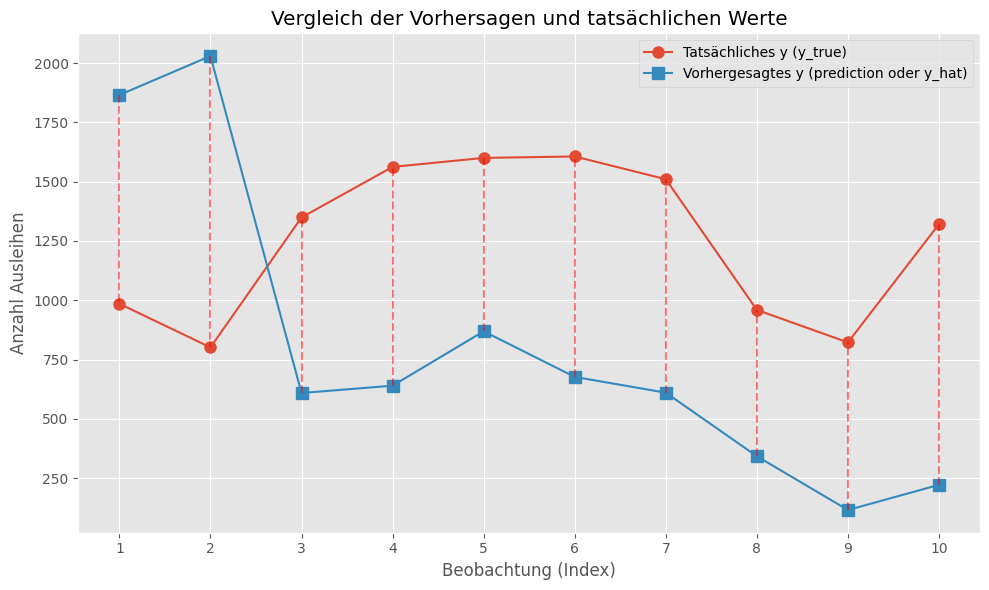


Endwert der Kostenfunktion nach Gradient Descent: 1179806.212


In [4]:
# CODE ANTWORTZELLE
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir("/home/jovyan/work/graded_assignments/graded_assignment_1")
df_train = pd.read_csv("velo_ausleihe_train.csv")

X_train = df_train[['temp']].values
y_train = df_train['anzahl_ausleihen'].values

ridge_gradient_descent = RidgeRegression(alpha=0.1, optimization_method="bgd", learning_rate=0.001,
                                         max_num_steps=1000, verbose=False)
ridge_gradient_descent.fit(X_train, y_train)

ridge_normalen_gleichung = RidgeRegression(alpha=0.1, optimization_method="normalequation",
                                           learning_rate=0.1, max_num_steps=1000, verbose=False)
ridge_normalen_gleichung.fit(X_train, y_train)

print("Gradient Descent Koeffizienten w lautet:", ridge_gradient_descent.w_)
print("Normalengleichung Koeffizienten w lautet:", ridge_normalen_gleichung.w_)

r2_score = ridge_normalen_gleichung.score(X_train, y_train)
print(f"R^2 is: {r2_score:.3f}")

prediction = ridge_gradient_descent.predict(X_train)  # wäre ein synonym für y_hat also y mit dach
error = y_train - prediction  # synonym wäre residuals
y_true = y_train[:10]

results_df = pd.DataFrame({
    'y_true': y_train[:10],
    'y_hat': prediction[:10],
    'Error': error[:10]
})

print("\nErste 10 Beobachtungen:")
print(results_df)

# Visualisierung der Predictions, error und effektiven Werten (Optional für mich als Visualisierung)
indices = np.arange(1, 11)

plt.figure(figsize=(10, 6))
plt.plot(indices, y_true, 'o-', label='Tatsächliches y (y_true)', markersize=8)
plt.plot(indices, prediction[:10], 's-', label='Vorhergesagtes y (prediction oder y_hat)',
         markersize=8)

for i in range(10):
    plt.vlines(indices[i], ymin=prediction[i], ymax=y_true[i], color='red', linestyles='dashed',
               alpha=0.5)

plt.xlabel('Beobachtung (Index)')
plt.ylabel('Anzahl Ausleihen')
plt.title('Vergleich der Vorhersagen und tatsächlichen Werte')
plt.xticks(indices)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

final_cost = ridge_gradient_descent.cost(X_train, y_train)
print(f"\nEndwert der Kostenfunktion nach Gradient Descent: {final_cost:.3f}")

## Aufgabe 4 (6 Punkte)

Untersuche im unregularisierten Modell aus Aufgabe 3, ob die Annahmen eines linearen Modells erfüllt sind.  

Lese dazu beispielsweise im [Skript von Stahel](https://stat.ethz.ch/~stahel/courses/regression/reg-resanal.pdf) nach, wie du hier vorgehen kannst.

Zeichne dazu diagnostische Plots, inklusive eines Tukey-Anscombe Plots. Interpretiere die Plots.

In [ ]:
# CODE ANTWORTZELLE
import matplotlib.pyplot as plt
import scipy.stats as stats

# Annahme 01: Zusammenhang zwischen X und y ist Linear
# Lösungsansatz: Turkey Anscombe Plot
ridge_unregression = RidgeRegression(alpha=0.0, optimization_method="normalequation")
ridge_unregression.fit(X_train, y_train)

y_hat = ridge_unregression.predict(X_train)
residuals = y_train - y_hat

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Diagnoseplots für Lineares Regressionsmodell', fontsize=16)

# Annahme 01: Lineare Beziehung
axes[0, 0].scatter(X_train, y_train, label='Daten', alpha=0.6)
axes[0, 0].plot(X_train, y_hat, color='red', label='Ridge Regression')
axes[0, 0].set_title('Annahme 1: Lineare Beziehung')
axes[0, 0].set_xlabel('Temperatur (temp)')
axes[0, 0].set_ylabel('Anzahl Ausleihen')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Annahme 02 A: Die Residuen sind normalverteilt / Histogramm
axes[0, 1].hist(residuals, bins=15, edgecolor='red', alpha=0.7)
axes[0, 1].set_title('Annahme 2: Histogramm der Residuen')
axes[0, 1].set_xlabel('Residuen')
axes[0, 1].set_ylabel('Häufigkeit')

# Annahme 02 B: Die Residuen sind normalverteilt  / Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Annahme 2: Q-Q Plot (Normalverteilung)')

# Annahme 03: Homoskedastizität: Varianz der Fehler
axes[1, 1].scatter(y_hat, residuals, alpha=0.6)
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_title('Annahme 3: Residuen vs. y_hat (Homoskedastizität)')
axes[1, 1].set_xlabel('Vorhergesagte Werte (y_hat)')
axes[1, 1].set_ylabel('Residuen')
axes[1, 1].grid(True)

# Annahme 04: Unabhängigkeit der Fehler
axes[2, 0].plot(residuals, marker='o', linestyle='-', alpha=0.7)
axes[2, 0].axhline(0, color='red', linestyle='--')
axes[2, 0].set_title('Annahme 4: Residuen in Beobachtungsreihenfolge')
axes[2, 0].set_xlabel('Index')
axes[2, 0].set_ylabel('Residuum')
axes[2, 0].grid(True)

# Annahme 05 Ausreisser & Homoskedastizität
axes[2, 1].scatter(X_train, residuals, alpha=0.7)
axes[2, 1].axhline(0, color='red', linestyle='--')
axes[2, 1].set_title('Annahme 5: Residuen vs. Temperatur')
axes[2, 1].set_xlabel('Temperatur (temp)')
axes[2, 1].set_ylabel('Residuen')
axes[2, 1].grid(True)

plt.tight_layout()
plt.show()


Diskutiere ob die Modell-Annahmen eines linearen Modells erfüllt sind. Was schliest du daraus?

(Es folgt eine Textantwortzelle. Nicht löschen.)

Annahme 01 - Lineare Beziehung zwischen X und y: Erfüllt -> das Diagramm zeigt einen klaren linearen Trend

Annahme 02 - Normalverteilung der Residuen -> Es gibt einige Ausreiser ganz links und rechts somit würde ich sagen ist die Normalverteilung nicht perfekt.

Annahme 03 - Konstante Variant der Fehler: Die Streuung scheint mir nicht konstant zu sein.

Annahme 04 - Unabhängigkeit der Fehler: Ich erkenne keine sichtbaren Abhängigkeiten. Aber ich kann es nich mit Sicherheit ausschliessen

Annahme 05 - Keine Ausreisser mit starkem Einfluss: Hier würde ich sagen das dies nicht erfüllt ist. Man sieht auf dem Diagramm 05 ganz klare und grobe Ausreisser (vor allem nach unten).

## Aufgabe 5 (4 Punkte)

Entwickle nun ein unregularisiertes multiples lineares Regressionsmodell für die Zielgrösse `anzahl_ausleihen` mit sämtlichen möglichen Input-Variablen.  

Am Besten verwendest dazu eine [scikit-learn Pipeline](https://scikit-learn.org/stable/modules/compose.html).

Berechne neben dem Bestimmtheitsmass auch den [*Mean Absolute Error* (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)  auf Trainings- und Testdaten und gib diese aus.  

In [ ]:
# CODE ANTWORTZELLE
import os
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score

os.chdir("/home/jovyan/work/graded_assignments/graded_assignment_1")
df_train = pd.read_csv("velo_ausleihe_train.csv")
df_test = pd.read_csv("velo_ausleihe_test.csv")

X_train = df_train.drop(columns=['anzahl_ausleihen'])  # nur noch Features einarbeiten ohne y-werte
y_train = df_train['anzahl_ausleihen']
X_test = df_test.drop(columns=['anzahl_ausleihen'])
y_test = df_test['anzahl_ausleihen']

number_features = ["temp", "feuchtigkeit", "windgeschwindigkeit", "windchill", "monat", "jahr"]
boolean_features = ["feiertag"]
category_features = ["wetterlage", "wochentag", "saison"]

# Verarbeitet zuerst kategorische Werte um in Zahlenwerte (OneHotEncoder)
preprocessor_pipeline = ColumnTransformer([
    ("num", StandardScaler(), number_features),
    ("cat", OneHotEncoder(drop='first'), category_features),
    ("bool", "passthrough", boolean_features)

])

model = Pipeline([
    ("preprocessing", preprocessor_pipeline),
    ("unregulierte_lineare_Regression", RidgeRegression(
        optimization_method="normalequation",
        alpha=0.0,
        verbose=False
    ))
])

model.fit(X_train, y_train)

# Vorhersagen vom Model
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

# MAE berechnung
MAE_train = mean_absolute_error(y_train, y_train_hat)
MAE_test = mean_absolute_error(y_test, y_test_hat)

# Bestimmtheit berechnung (R^2)
r2_train = r2_score(y_train, y_train_hat)
r2_test = r2_score(y_test, y_test_hat)

print(f"MAE für Trainingsdaten lautet: {MAE_train}")
print(f"R2 Score für Trainingsdaten lautet: {r2_train}")
print(f"MAE für Testdaten lautet: {MAE_test}")
print(f"R2 Score für Testdaten lautet: {r2_test}")


Interpretiere das Ergebnis.

(Es folgt eine Textantwortzelle. Nicht löschen.)

Das Modell erzielt auf den Trainingsdaten einen hohen R²-Wert, was auf eine gute Anpassung hindeutet. Auf den Testdaten ist der R² jedoch stark negativ, was bedeutet, dass das Modell dort schlechter abschneidet als ein einfacher Mittelwert. Ich denke das deutet auf Overfitting hin: Das Modell hat die Trainingsdaten zu stark auswendig gelernt und hat mühe sich auf neue Werte anzupassen. Ich denke, die Ursache ist der fehlende Regularisierungseffekt beim eingesetzten Ridge-Modell mit alpha = 0 in Kombination mit vielen Input-Variablen – von denen nicht alle wichtig sind und einige mehr stören als das sie etwas zur Prognose beisteuern.

## Aufgabe 6 (5 Punkte)

Untersuche nun den Effekt der Regularisierung $\lambda$ (Parameter `alpha`) auf das Modell. Trainiere dazu mehrere Modelle mit verschiedenen Werten von `alpha` und vergleiche dann die Resultate:

- Wähle die `alpha` über einen grosszügig gewählten Bereich, der den Effekt der Regularisierung vollständig aufzeigt. Alle anderen Parameter sollen für alle Modelle identisch sein.
- Vergleiche für die verschiedenen Modelle die gefundenen Modell-Koeffizienten $\mathbf{w}$. Plotte dazu `alpha` auf der X-Achse und den Wert von jedem Modell-Koeffizient auf der Y-Achse. Beispiel: [Link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)

Am Besten verwendest dazu erneut eine scikit-learn Pipeline.

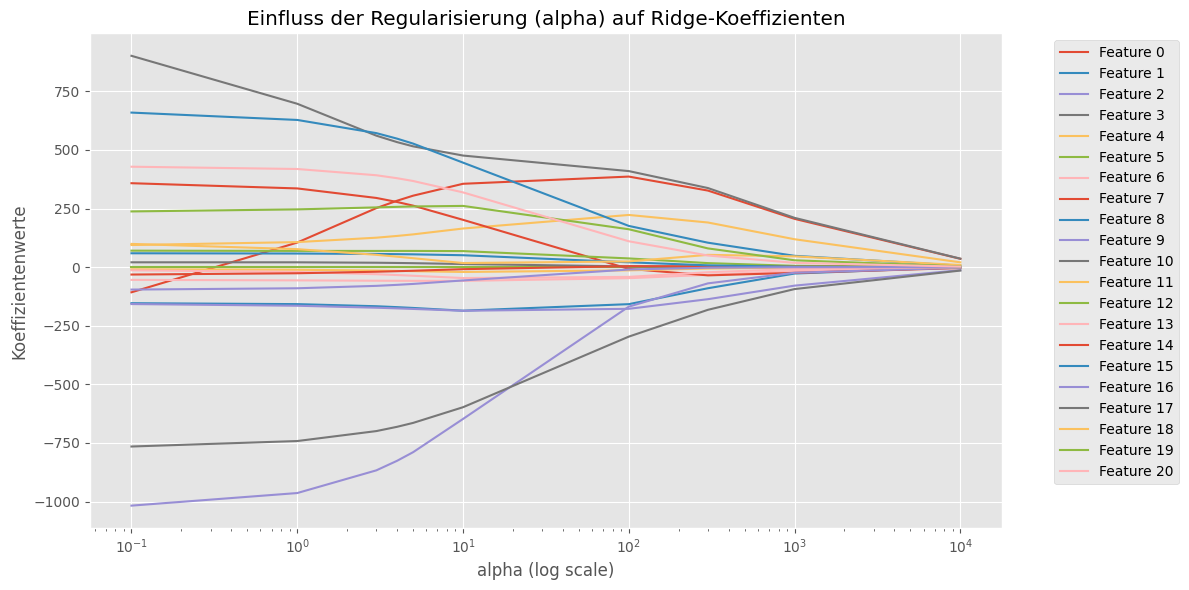

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

alphas = [0.1, 1, 3, 4, 5, 10, 100, 300, 1000, 10000]
coefs = []

os.chdir("/home/jovyan/work/graded_assignments/graded_assignment_1")
df_train = pd.read_csv("velo_ausleihe_train.csv")

X_train_df = df_train.drop(columns=['anzahl_ausleihen'])
y_train_series = df_train['anzahl_ausleihen']

number_features = ["temp", "feuchtigkeit", "windgeschwindigkeit", "windchill", "monat", "jahr",
                   "feiertag"]
category_features = ["wetterlage", "wochentag", "saison"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), number_features),
    ("cat", OneHotEncoder(), category_features)
])

X_train_prepared = preprocessor.fit_transform(X_train_df)
y_train_prepared = y_train_series.to_numpy(dtype=np.float64)

# Ridge-Modelle trainieren
for alpha in alphas:
    model = RidgeRegression(alpha=alpha, optimization_method="normalequation", verbose=False)
    model.fit(X_train_prepared, y_train_prepared)
    coefs.append(model.w_[1:])  # ohne Bias

coefs = np.array(coefs)

# Plot
plt.figure(figsize=(12, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=f'Feature {i}')

plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('Koeffizientenwerte')
plt.title('Einfluss der Regularisierung (alpha) auf Ridge-Koeffizienten')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Interpretiere den Plot. Was sieht man und warum sieht es so aus?

(Es folgt eine Textantwortzelle. Nicht löschen.)

Anhand des Plots kann man schön visualisiert sehen wie alpha einfluss auf die Modellkoeffizienten nimmt. Bei kleinen alpha-Werten sind die MOdellkoeffizienten noch relativ gross was auf ein komplexes überangepasstes Modell hindeuten könnte. MIt zunehmender Regularisierung (also steigendem Alpha-Wert) werden die Koeffizienten sukzessive kleiner und nähern sich 0 an. Durch diese Verbesserung wird das Modell einfacher und robuster gegenüber Überregulierung oder Überanpassung. Besonders stark gewichtete Features werden durch die Regularisierung stärker gedämpft.

## Aufgabe 7 (4 Punkte)

Entwickle nun dein bestes Ridge-Regression-Modell im Sinne von $R^2$ auf dem Trainingsdatensatz.

Du darfst durch Feature-Transformation beliebige weitere Attribute hinzufügen.  

Berechne $R^2$ und MAE auf Trainings- und Testdatensatz.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("velo_ausleihe_train.csv")

X = df.drop(columns=["anzahl_ausleihen"])
y = df["anzahl_ausleihen"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ["temp", "feuchtigkeit", "windgeschwindigkeit", "windchill", "monat", "jahr"]
categorical_features = ["wetterlage", "wochentag", "saison"]
boolean_features = ["feiertag"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ("num", "passthrough", numerical_features),
    ("bool", "passthrough", boolean_features)
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge", RidgeRegression(
        optimization_method="normalequation",
        alpha=10.0,
        verbose=False
    ))
])

pipeline.fit(X_train, y_train)

y_train_hat = pipeline.predict(X_train)
y_test_hat = pipeline.predict(X_test)

r2_train = r2_score(y_train, y_train_hat)
r2_test = r2_score(y_test, y_test_hat)
mae_train = mean_absolute_error(y_train, y_train_hat)
mae_test = mean_absolute_error(y_test, y_test_hat)

print(f"Train R²: {r2_train:.4f}")
print(f"Test  R²: {r2_test:.4f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test  MAE: {mae_test:.2f}")


Interpretiere dein Resultat, vergleiche mit Aufgabe 5.  

(Es folgt eine Textantwortzelle. Nicht löschen.)

In Aufgabe 07 konnte das Modell im Vergleich zu Aufgabe 05 deutlich verbessert werden. Während das unregularisierte lineare Regressionsmodell aus Aufgabe 05 auf den Trainingsdaten noch gute Ergebnisse erzielte (R² ≈ 0.81), fiel die Leistung auf den Testdaten stark ab (R² < 0), was auf Overfitting hingewiesen hatte. In Aufgabe 07 hingegen erreicht das regularisierte Modell mit Feature-Transformationen sowohl auf Trainings- als auch auf Testdaten deutlich bessere Werte (R² ≈ 0.94 / 0.83). Der Einsatz von Regularisierung sowie der Polynom-Features und sinnvoller Vorverarbeitung hat die Generalisierungsfähigkeit des Modells stark verbessert. Somit konnten die Störfaktoren reduziert werden und das Overfitting Problem hat sich ebenfalls verbessert.

## Aufgabe 8 (8 Punkte)

[$k$-Nearest-Neighbours](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (kNN) ist ein populäres Machine Learning-Modell. Dabei wird die Vorhersage für einen neuen Datenpunkt $\mathbf{x}^{(test)}$ als Funktion $\hat f(\cdot)$ der Output-Werte seiner $k$ nächsten Input-Raum-Nachbarn im Trainings-Set $\mathcal{N}_k^{(train)}$ vorgenommen. Als einfachen Ansatz für Regressionsprobleme bietet es sich an, für $\hat f(\cdot)$ den Mittelwert der Nachbarpunkte zu berechnen:

\begin{equation}
\hat f(\mathbf{x}^{(test)}) = \frac{1}{k} \sum_{x^{(i)} \in \mathcal{N}_k^{(train)}} y^{(i)}
\end{equation}

Implementiere einen kNN Regressor gemäss Scikit-Learn API, i.e. analog der Klasse in Aufgabe 3. Du darfst hier `scipy.spatial.distance` verwenden.

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.spatial import distance


class KNNRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, k: int):
        self.k = k

    def fit(self, X, y):
        """Fit the model coefficients.
        Args:
            X (ndarray)
            y
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X = np.array(X)
        y_pred = []

        for x_test in X:
            distances = distance.cdist([x_test], self.X_train, metric='euclidean')[0] # berechnet die euklidische Distanz zwischen testpunkt x_test und allen Punkten im Trainingssatz X
            nearest_indices = np.argsort(distances)[:self.k] # sortiert die Distanzen
            y_pred.append(np.mean(self.y_train[nearest_indices]))

        return np.array(y_pred)

    def score(self, X, y):
        from sklearn.metrics import r2_score
        return r2_score(y, self.predict(X))


Was ist eine Schwierigkeit für den vorliegenden Datensatz? Was für einen Lösungsansatz schlägst du vor?

(Es folgt eine Textantwortzelle. Nicht löschen.)

kNN funktioniert nur zuverlässig, wenn alle Features sinnvoll im gleichen metrischen Raum liegen. Aber
wenn man "Montag" und "Sonntag" mit OneHot kodierst, dann hat deren Entfernung keinen klaren Bezug zur tatsächlichen "Ähnlichkeit".
Gleiches gilt für "saison" (Frühling, Sommer, …): kNN versteht keine semantische Nähe wie Frühling ≈ Sommer.

Mein Lösungsansatz:
* Feature Scaling anwenden
* Kategorische Features möglichst sinnvoll encodieren
* Die Dimensionalität reduzieren

Wähle einen geeigneten Wert für $k$ und berechne erneut $R^2$ und MAE auf Trainings- und Testdatensatz.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

number_features = ["temp", "feuchtigkeit", "windgeschwindigkeit", "windchill", "monat", "jahr",
                   "feiertag"]
categorical_features = ["wetterlage", "wochentag", "saison"]

ct = ColumnTransformer([
    ("num", StandardScaler(), number_features),
    ("cat", OneHotEncoder(), categorical_features)
])

# Zielvariablen
y_train = df_train["anzahl_ausleihen"].to_numpy()
y_test = df_test["anzahl_ausleihen"].to_numpy()

# Features
X_train_prepared = ct.fit_transform(df_train)
X_test_prepared = ct.transform(df_test)

knn = KNNRegressor(k=5)
knn.fit(X_train_prepared, y_train)

y_train_hat = knn.predict(X_train_prepared)
y_test_hat = knn.predict(X_test_prepared)

print( f"Train: R² = {r2_score(y_train, y_train_hat):.4f}, MAE = {mean_absolute_error(y_train, y_train_hat):.2f}")
print(f"Test:  R² = {r2_score(y_test, y_test_hat):.4f}, MAE = {mean_absolute_error(y_test, y_test_hat):.2f}")


Diskutiere das Ergebnis für $k$, sowie die erreichten Metrik-Werte und vergleiche auf deren Basis das beste kNN-Modell mit deinem besten Modell aus Aufgabe 7.

Diskutiere hier weiter auch den Bias-Variance-Tradeoff.

(Es folgt eine Textantwortzelle. Nicht löschen.)

Im Vergleich zum Ridge-Modell aus Aufgabe 07 schneidet das kNN-Modell deutlich schlechter ab. Während das Ridge-Modell sowohl auf den Trainings- als auch auf den Testdaten sehr gute Resultate erzielt (R² ≈ 0.94 / 0.83), erreicht das kNN-Modell auf den Trainingsdaten noch akzeptable Werte, versagt aber bei der Generalisierung auf die Testdaten (R² < 0). Das zeigt, dass kNN trotz korrektem Preprocessing nicht gut mit den strukturellen Unterschieden im Datensatz umgehen kann.

Im Sinne des Bias-Variance-Tradeoffs hat das kNN-Modell bei kleinem 𝑘 zwar einen tiefen Bias, dafür aber eine sehr hohe Varianz. Es passt sich zu stark an die Trainingsdaten an und reagiert empfindlich auf kleine Veränderungen. Das Ridge-Modell hingegen ist stärker reguliert, hat dadurch etwas höheren Bias, aber deutlich geringere Varianz – und kann deshalb besser generalisieren. Insgesamt ist das Ridge-Modell deutlich stabiler und praxisnäher einsetzbar.

## Aufgabe 9 (2 Punkte)

Wie könntest du den k-Nearest-Neighbour-Ansatz modifizieren, sodass er zur Klassifikation eingesetzt werden könnte?  

(Es folgt eine Textantwortzelle. Nicht löschen.)

Beim k-Nearest-Neighbour-Ansatz für Klassifikation wird statt des Mittelwerts der Zielwerte das Mehrheitsvotum der Klassen der k nächsten Nachbarn verwendet. Das bedeutet, die häufigste Klasse unter den k Nachbarn bestimmt die Vorhersage. Alternativ kann man zum Beispiel auch gewichtete Stimmen nutzen, bei denen näher liegende Nachbarn mehr Einfluss haben
